### Atividade 03: Filtragem de Sinais

### Questão 1: 
Mostre que o problema de ﬁltragem com regularização de Tikhonov pode ser formulado como um problema de quadrados mínimos. Mostre que o problema de ﬁltragem com regularização do tipo LASSO pode ser formulado como um problema de otimização quadrática. Conclua que os dois problemas de otimização propostos são convexos.

#### **Resposta:**
O segrego para transformar o problema de regularização de Tikhonov como um problema de quadrados mínimos é interpretar os dois termos que se somam como um operador conjunto, isto é, tome 

$$ \tilde{A} =\begin{bmatrix}
A \\ \sqrt{\delta} D
\end{bmatrix}, \quad \tilde{b} = \begin{bmatrix} b \\ 0\end{bmatrix}$$

Assim temos
$$
\begin{align*}
& \max_{u \in \mathbb{R}^n} & &  \left\| \tilde{A}u - \tilde{b} \right\|_{2}^{2}  \nonumber \\
\end{align*} $$ 

Recuperamos o problema original expandindo os termos:

$$ \left\| \tilde{A}u - \tilde{b} \right\|_{2}^{2} = \left\|\begin{bmatrix}
A \\ \sqrt{\delta} D
\end{bmatrix}u - \begin{bmatrix} b \\ 0\end{bmatrix} \right\| = \left\| Au - b\right\|^{2}_2 + \left\|\sqrt{\delta} Du \right\|^{2}_2 = \left\| Au - b\right\|^{2}_2 + \delta\left\|Du \right\|^{2}_2 $$ 

Para o caso do LASSO conseguimos transformar o problema em uma formulação de programação quadrática colocando
algumas variáveis adicionais, da seguinte forma:

<center><img src="assets/lasso-qp1.png"/></center>

Sendo assim o problema se torna: 

<center><img src="assets/lasso-qp1.png"/></center>

(Sim é dos slides fiquei com preguiça de escrever em Latex mas eu entendi o conceito, que limitamos a norma por um vetor de variáveis que amarrar o valor máximo das variáveis dos módulos)

Para concluir, quadrados mínimos é um exemplo de QP (programação quadratica) e como acabamos de mostrar que LASSO também é QP, assim como sabemos que QP é uma subclasse de problemas de otimização convexa (isto é, função objetivo convexa e conjunto de restrições convexo), então esses problemas são problemas de otimização convexa.


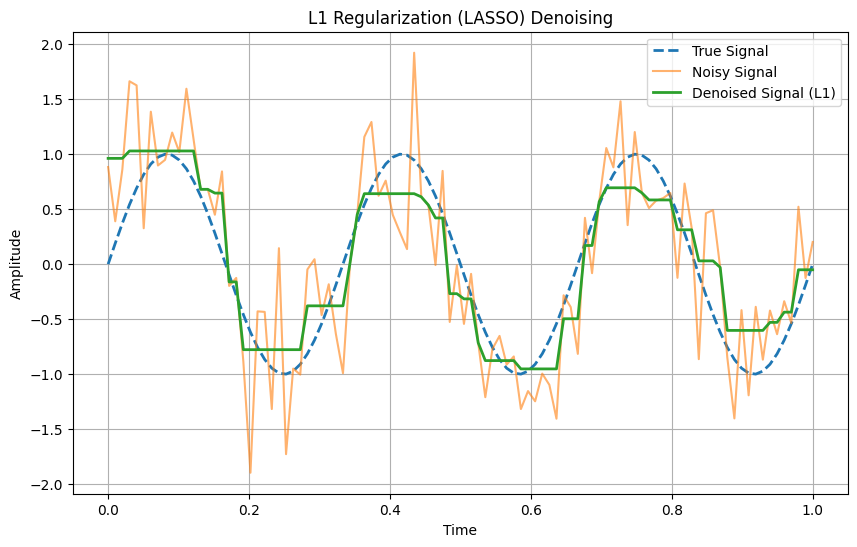

In [7]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

def l1_denoise(y, lam=1.0):
    """
    Denoise a signal using L1 regularization (LASSO) on the first differences.
    
    Parameters:
    - y: Noisy signal (1D numpy array)
    - lam: Regularization parameter (higher = more denoising, but may oversmooth)
    
    Returns:
    - Denoised signal (1D numpy array)
    """
    n = len(y)
    x = cp.Variable(n)
    
    # Objective: minimize ||x - y||_2^2 + lam * ||Dx||_1
    # where D is the first difference matrix (to promote sparsity in derivatives)
    D = np.eye(n) - np.eye(n, k=-1)  # First difference matrix (n-1 x n)
    D = D[1:, :]  # Remove first row (since diff starts from second element)
    
    objective = cp.Minimize(cp.sum_squares(x - y) + lam * cp.norm(D @ x, 1))
    problem = cp.Problem(objective)
    problem.solve()
    
    return x.value

# Example usage
if __name__ == "__main__":
    # Generate a synthetic signal with noise
    np.random.seed(0)
    N = 100
    t = np.linspace(0, 1, N)
    true_signal = np.sin(2 * np.pi * t * 3)  # True signal (sine wave)
    noisy_signal = true_signal + 0.5 * np.random.randn(N)  # Add Gaussian noise
    
    # Denoise with L1 regularization
    denoised_signal = l1_denoise(noisy_signal, lam=1.5)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(t, true_signal, label="True Signal", linestyle="--", linewidth=2)
    plt.plot(t, noisy_signal, label="Noisy Signal", alpha=0.6)
    plt.plot(t, denoised_signal, label="Denoised Signal (L1)", linewidth=2)
    plt.legend()
    plt.title("L1 Regularization (LASSO) Denoising")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()